Pneumonia Detection![alt text](https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2016/05/18/13/02/ww5r032t-8col-jpg.jpg)

**Pneumonia Detection using 6000 Chest X-Ray HD Images.**
[link text](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)



**Chest X-Ray of Infected Person**![alt text](https://radiologyassistant.nl/assets/chest-x-ray-lung-disease/a51a0976c3619b_TAB-density-new.jpg)

**Chest X-Ray of healthy Person**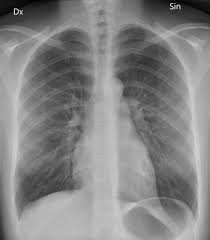

**This notebook tackles pneumonia classification using CNN and ANN.**
Symtopms include some combination of productive or dry cough, chest pain, fever and difficulty breathing.


In [ ]:
# Importing Libraries
import numpy as np #Linear Algebra
import matplotlib.pyplot as plt
import cv2
import os
import pickle
%matplotlib inline


In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 300 #Setting all the images to 300 pixels



In [ ]:
# Defining the function to get data
def get_data(data_dir):
  data = []
  for label in labels:
    path = os.path.join(data_dir, label)
    class_num = labels.index(label)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

        resized_array = cv2.resize(img_array, (img_size, img_size))
        data.append([resized_array, class_num])

      except Exception as e:
        pass

  return np.array(data)


In [ ]:
# Getting train data
train = get_data('/content/drive/My Drive/chest_xray/train')

In [ ]:
# Getting test data
test = get_data('/content/drive/My Drive/chest_xray/test')

In [ ]:
# Getting Validadtion Data
val = get_data('/content/drive/My Drive/chest_xray/val')

In [ ]:
# Counting total numbers of images in train
pneumonia = 0 
normal = 0 

for i, j in train:
  if j == 0:
    pneumonia += 1

  else:
    normal += 1

print("Pneumonia Images:", pneumonia)
print("Normal Images:", normal)
print("Total Images:", pneumonia + normal)




Pneumonia Images: 3875
Normal Images: 1341
Total Images: 5216


In [ ]:
# Counting total images in test
pneumonia1 = 0 
normal1 = 0 

for i, j in test:
  if j == 0:
    pneumonia1 += 1

  else:
    normal1 += 1

print("Pneumonia Images:", pneumonia1)
print("Normal Images:", normal1)
print("Total Images:", pneumonia1 + normal1)

Pneumonia Images: 390
Normal Images: 234
Total Images: 624


In [ ]:
normal_pic = [] 
for i, j in train:
    if j == 1:
        normal_pic.append(i)



PNEUMONIA


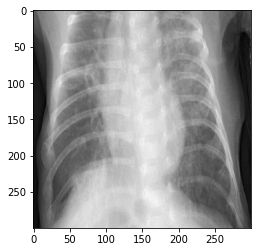

In [ ]:
# Visualizing the Images
plt.imshow(train[1][0], cmap='gray')
print(labels[train[1][1]])

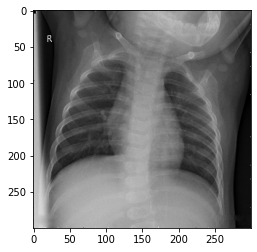

In [ ]:
plt.imshow(normal_pic[0], cmap = 'gray')

In [ ]:
X = []
y = []

In [ ]:
# For training data
for feature, label in train:
  X.append(feature)
  y.append(label)



In [ ]:
# For test data
for feature, label in test:
  X.append(feature)
  y.append(label)
  

In [ ]:
# Lets count total Images
len(X)

5840

In [ ]:
len(y)

5840

In [ ]:
# Lets see how X looks in Matrix 
X[1]

array([[77, 75, 81, ..., 67, 66, 68],
       [75, 74, 78, ..., 67, 66, 70],
       [73, 73, 75, ..., 67, 66, 70],
       ...,
       [21, 20, 19, ..., 41, 41, 35],
       [21, 20, 19, ..., 42, 39, 34],
       [21, 21, 18, ..., 43, 43, 39]], dtype=uint8)

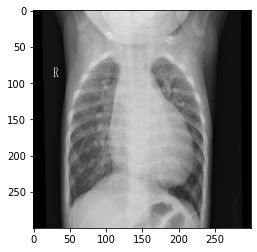

In [ ]:
#Lets see X image
plt.imshow(X[100], cmap = 'gray' )

In [ ]:
# Rezize the data for Neural Networks
X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

In [ ]:
# Lets shuffel the data and split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
len(X_train)

4672

In [ ]:
len(X_test)

1168

In [ ]:
len(y_train)

4672

In [ ]:
len(y_test)

1168

In [ ]:
# Dividing data by 255
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# Lets see the image size of reshaping
X_train[0].shape

(300, 300, 1)

In [ ]:
# Importing Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
# Tensorflow Version
tf.__version__

'2.2.0-rc2'

In [ ]:
# Defining the callback funtion
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs ={}):
    if (logs.get('acc') >  0.99):
      print("\n Model Reached 99.9% accuracy so stopped Training!")
      slef.model.stop_training = True


In [ ]:
# Building the model
model = Sequential([
                    
      #Adding convolution layer
      tf.keras.layers.Conv2D(256, (3,3), input_shape = X_train[0].shape, strides = (1,1), padding = 'same', activation = 'relu'),

      #Adding Maxpooling Layer
      tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'same'),

      # Adding second convolution layer
      tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = 'same', activation = 'relu'),
      tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'same'),

      # Adding third convolution Layer
      tf.keras.layers.Conv2D(64, (3,3), strides = (1,1), padding = 'same', activation = 'relu'),
      tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'same'),

      # Flattening the images
      tf.keras.layers.Flatten(),

      # Dropouting
      tf.keras.layers.Dropout(0.2),

      # Adding Dense Layer
      tf.keras.layers.Dense(units = 512, activation = 'relu'),

      # Adding output layer
      tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
adam = Adam(lr = 0.0001) # One of the hyper parameter Tuning


In [ ]:
# Comiling the model
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 256)     2560      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 128)     295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 92416)             0

In [ ]:
# Fitting the model
#callback = mycallback()
history = model.fit(X_train, y_train, batch_size = 32, epochs = 15,validation_split = 0.25)

Epoch 1/15
110/110 [==============================] - 440s 4s/step - loss: 0.3023 - accuracy: 0.8650 - val_loss: 0.2114 - val_accuracy: 0.9170
Epoch 2/15
110/110 [==============================] - 442s 4s/step - loss: 0.1661 - accuracy: 0.9446 - val_loss: 0.1964 - val_accuracy: 0.9272
Epoch 3/15
110/110 [==============================] - 442s 4s/step - loss: 0.1311 - accuracy: 0.9538 - val_loss: 0.2007 - val_accuracy: 0.9298
Epoch 4/15
110/110 [==============================] - 442s 4s/step - loss: 0.1387 - accuracy: 0.9463 - val_loss: 0.1621 - val_accuracy: 0.9435
Epoch 5/15
110/110 [==============================] - 446s 4s/step - loss: 0.1142 - accuracy: 0.9575 - val_loss: 0.1821 - val_accuracy: 0.9332
Epoch 6/15
110/110 [==============================] - 439s 4s/step - loss: 0.0983 - accuracy: 0.9663 - val_loss: 0.1689 - val_accuracy: 0.9341
Epoch 7/15
110/110 [==============================] - 438s 4s/step - loss: 0.0842 - accuracy: 0.9697 - val_loss: 0.1719 - val_accuracy: 0.9401

In [ ]:
# Reached almost 100% Accuracy
# Lets Save the model 
model.save('pneumonia.h5')

In [ ]:
# Loading the model
from tensorflow.keras.models import load_model

In [ ]:
loaded_model = load_model('pneumonia.h5')

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 256)     2560      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 128)     295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 92416)             0

In [ ]:
loaded_model.evaluate(X_test, y_test)

37/37 [==============================] - 24s 646ms/step - loss: 0.1675 - accuracy: 0.9461


[0.16754050552845, 0.9460616707801819]

In [ ]:
# Predict the model
pred = model.predict(X_train)


In [ ]:
# Calculating thresolds usings Precision_recall_curve
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, pred)


In [ ]:
precisions

array([0.3971875 , 0.39699906, 0.3971232 , ..., 1.        , 1.        ,
       1.        ])

In [ ]:
recalls

array([1.00000000e+00, 9.99213218e-01, 9.99213218e-01, ...,
       1.57356412e-03, 7.86782061e-04, 0.00000000e+00])

In [ ]:
thresholds

array([8.6295200e-05, 8.6817556e-05, 8.6948392e-05, ..., 9.9999452e-01,
       9.9999511e-01, 9.9999881e-01], dtype=float32)

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds2 = roc_curve(y_train, pred)

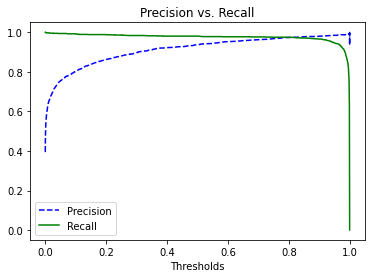

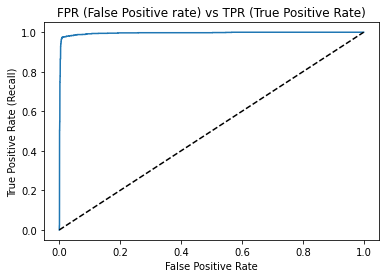

In [ ]:
# Plotting the Graph
precisions, recalls, thresholds = precision_recall_curve(y_train, pred)
fpr, tpr, thresholds2 = roc_curve(y_train, pred)
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--')
    plt.plot(thresholds, recalls[:-1], 'g-')
    plt.title('Precision vs. Recall')
    plt.xlabel('Thresholds')
    plt.legend(['Precision', 'Recall'], loc='best')
    plt.show()

def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('FPR (False Positive rate) vs TPR (True Positive Rate)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.show()
    
plot_precision_recall(precisions, recalls, thresholds)
plot_roc(fpr, tpr)

In [ ]:
y_pred = model.predict(X_test)
y_pred[0]

array([0.9997791], dtype=float32)

In [ ]:
binary_predictions = []
threshold = thresholds[np.argmax(precisions >= 0.90)]
for i in y_pred:
    if i >= threshold:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

In [ ]:
# Checking the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(binary_predictions, y_test)

In [ ]:
score*100

93.4931506849315